In [2]:
from langgraph.graph import StateGraph, START, MessagesState
from langgraph.checkpoint.memory import InMemorySaver

from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import RemoveMessage # used for permanent deletion from state

In [3]:
load_dotenv()

True

In [4]:
model = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash"
)

E0000 00:00:1767808167.289222    6700 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


In [5]:
def chat(state: MessagesState):
    response = model.invoke(state["messages"])
    return {"messages": [response]}

def delete_old_messages(state: MessagesState):
    msgs = state["messages"]

    # if more than 10 messages, delete the earliest 6
    if len(msgs) > 10:
        to_remove = msgs[:6]
        return {"messages": [RemoveMessage(id=m.id) for m in to_remove]}

    return {}

In [6]:
builder = StateGraph(MessagesState)
builder.add_node("chat", chat)
builder.add_node("cleanup", delete_old_messages)

In [7]:
builder.add_edge(START, "chat")
builder.add_edge("chat", "cleanup")   # run deletion after each response
builder.add_edge("cleanup", "__end__")

In [8]:
graph = builder.compile(checkpointer=InMemorySaver())

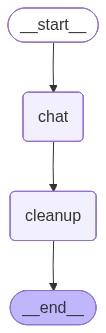

In [9]:
graph

In [10]:
config = {"configurable": {"thread_id": "t1"}}

In [11]:
# Run multiple turns
graph.invoke({"messages": [{"role": "user", "content": "Hi, I'm Rishu"}]}, config)
graph.invoke({"messages": [{"role": "user", "content": "Tell me about LangGraph"}]}, config)
graph.invoke({"messages": [{"role": "user", "content": "Now explain checkpointers"}]}, config)
graph.invoke({"messages": [{"role": "user", "content": "What is Langchain"}]}, config)
graph.invoke({"messages": [{"role": "user", "content": "What is Quantum Mechanics"}]}, config)
graph.invoke({"messages": [{"role": "user", "content": "What is Gen AI"}]}, config)
graph.invoke({"messages": [{"role": "user", "content": "What is my name"}]}, config)

Failed to multipart ingest runs: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')
Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')
Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')
Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 

{'messages': [HumanMessage(content='What is Langchain', additional_kwargs={}, response_metadata={}, id='a6620dea-5a4a-4a6c-87a3-762ad4b370bc'),
  AIMessage(content='Okay, Rishu, let\'s zoom out a bit. You\'ve asked about LangGraph, which is a powerful *part* of the LangChain ecosystem. Now, let\'s define the parent framework: **LangChain**.\n\n---\n\n### What is LangChain?\n\n**LangChain is an open-source framework designed to simplify the development of applications powered by large language models (LLMs).**\n\nIn essence, it provides a structured and modular way to connect LLMs with other sources of data and computation, allowing you to build much more complex and capable applications than you could with just raw LLM API calls.\n\n### The Problem LangChain Solves\n\nWhile LLMs are incredibly powerful, using them directly has limitations:\n\n1.  **Statelessness:** LLMs don\'t inherently remember past interactions in a conversation.\n2.  **Lack of External Knowledge:** They are limited

Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


In [12]:
snap = graph.get_state(config)
print("Stored messages after cleanup:", len(snap.values["messages"]))

Stored messages after cleanup: 8
